# Internal structures of data types

## list
`list` is Dynamic array https://en.wikipedia.org/wiki/Dynamic_array

![Dynamic array](images/Dynamic_array.png)

Brief description: It reserves memory for array with extra space for future items in advance.

- Fast read at random index.
- Fast insert/delete to the end.
- Slow insert/delete in the begging and middle, cause all data must be shifted to the end.

Source code: https://github.com/python/cpython/blob/e42b705188271da108de42b55d9344642170aa2b/Objects/listobject.c
Time complexity: https://wiki.python.org/moin/TimeComplexity#list

Memory consumption:

[88, 120, 184, 256, 336, 424, 520, 632, 760, 904, 1064, 1240, 1440, 1664]


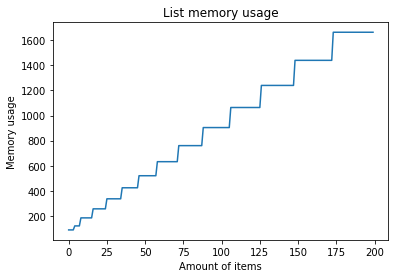

In [1]:
import sys
import matplotlib.pyplot as plt

my_list = []
list_actual_sizes = []

for i in range(200):
    my_list.append(i)
    list_actual_sizes.append(sys.getsizeof(my_list))

# for i in range(200):
#     my_list.pop()
#     list_actual_sizes.append(sys.getsizeof(my_list))

print(sorted(set(list_actual_sizes)))
plt.title('List memory usage')
plt.xlabel('Amount of items')
plt.ylabel('Memory usage')
plt.plot(list_actual_sizes)


## collections.deque

`deque` is Linked List - https://en.wikipedia.org/wiki/Linked_list

![Linked list](images/Doubly-linked-list.png)

- Slow read at random index
- Fast at insert/delete to the begging and end

Time complexity: https://wiki.python.org/moin/TimeComplexity#collections.deque

Well... Actually it's a bit more complicated. It's a linked list of blocks (small arrays) with fixed size.

Source code: https://github.com/python/cpython/blob/e42b705188271da108de42b55d9344642170aa2b/Modules/_collectionsmodule.c

Memory consumption:

[624, 1152, 1680, 2208, 2736, 3264, 3792]


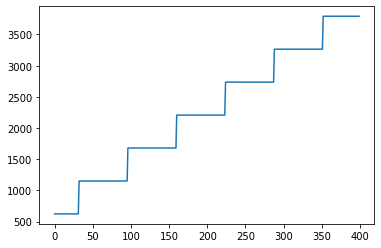

In [2]:
from collections import deque
my_deque = deque()
deque_actual_sizes = []

for i in range(400):
    my_deque.append(i)
    deque_actual_sizes.append(sys.getsizeof(my_deque))

# for i in range(1000):
#     my_deque.pop()
#     deque_actual_sizes.append(sys.getsizeof(my_deque))

print(sorted(set(deque_actual_sizes)))

plt.plot(deque_actual_sizes)

## dict

`dict` is a Hash table - https://en.wikipedia.org/wiki/Hash_table

https://speakerdeck.com/methane/new-dict-implementation-in-python-3-dot-6

Since python3.7 dict officially respects the order of insertion.

Time complexity: https://wiki.python.org/moin/TimeComplexity#dict

Memory consumption:

[232, 360, 640, 1176, 2272]


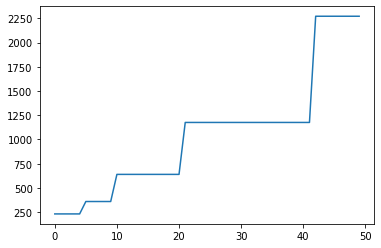

In [3]:
my_dict = {}
dict_actual_sizes = []

for i in range(50):
    my_dict[i] = i
    dict_actual_sizes.append(sys.getsizeof(my_dict))

print(sorted(set(dict_actual_sizes)))
plt.plot(dict_actual_sizes)

## set

`set` is very similar to dict, but with optimizations considering that all values are null.

Time complexity: https://wiki.python.org/moin/TimeComplexity#set

[216, 728, 2264, 8408]


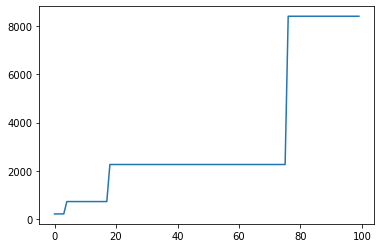

In [4]:
my_set = set()
set_actual_sizes = []

for i in range(100):
    my_set.add(i)
    set_actual_sizes.append(sys.getsizeof(my_set))

print(sorted(set(set_actual_sizes)))
plt.plot(set_actual_sizes)

## QUIZ

In [5]:
# helpers

import timeit
import time
from contextlib import contextmanager

@contextmanager
def timeme(name):
    start = time.process_time()
    try:
        yield
    finally:
        elapsed = time.process_time() - start
        print(f'{name}: took {elapsed:.6f}')

In [6]:
arr = [x for x in range(1_000_000)]
arr2 = deque(arr)

with timeme("list"):
    for i in range(len(arr)):
        arr[i]*2


with timeme("queue"):
    for i in range(len(arr2)):
        arr2[i]*2

list: took 0.122190
queue: took 33.140081


What is faster?

In [7]:
import random
import string
from collections import deque

def operation1(arr):
    """Insert b after each a"""
    indexes = []
    for i, value in enumerate(arr):
        if value == 'a':
            indexes.append(i)

    indexes.reverse()
    for i in indexes:
        arr.insert(i+1, 'b')


arr1 = [random.choice(string.ascii_lowercase) for _ in range(1_000_000)]
arr2 = deque(arr1)


print(f'operation1 with deque {timeit.timeit(lambda: operation1(arr2), number=1)}')
print(f'operation1 with list {timeit.timeit(lambda: operation1(arr1), number=1)}')

operation1 with deque 10.948332290000003
operation1 with list 13.220499405000005


What is faster on smaller amount of data?

In [8]:
arr1 = [random.choice(string.ascii_lowercase) for _ in range(1_000)]
arr2 = deque(arr1)


print(f'operation1 with deque on 1000 : {timeit.timeit(lambda: operation1(arr2), number=1)}')
print(f'operation1 with list on 1000 : {timeit.timeit(lambda: operation1(arr1), number=1)}')

operation1 with deque on 1000 : 9.813799999847106e-05
operation1 with list on 1000 : 9.45280000053117e-05


What is faster when it's used as a queue?

In [9]:
def plain_recursion_with_deque():
    queue = deque()
    queue.append('')

    while len(queue[0]) < 10:
        cur = queue.popleft()
        for char in ('a', 'b', 'c'):
            queue.append(cur + char)

def plain_recursion_with_list():
    queue = list()
    queue.append('')

    while len(queue[0]) < 10:
        cur = queue.pop(0)
        for char in ('a', 'b', 'c'):
            queue.append(cur + char)

print('plain_recursion_with_deque', timeit.timeit(plain_recursion_with_deque, number=50))
print('plain_recursion_with_list',timeit.timeit(plain_recursion_with_list, number=50))


plain_recursion_with_deque 0.9613772889999979
plain_recursion_with_list 8.652433681999995
